# Fraud Detection and Prevention
## Industry Scenario:
#### In an increasingly digital banking landscape, a major bank is facing a surge in sophisticated fraud attempts. The bank's current fraud detection system is unable to keep up with the evolving tactics used by fraudsters, leading to significant financial losses and damage to the bank's reputation.

## Problem Statement:
#### The bank needs a comprehensive analysis of its current fraud detection system, identification of loopholes, and the development of an advanced analytics solution to enhance fraud detection and prevention measures. The goal is to minimize financial losses, improve customer trust, and stay ahead of emerging fraud patterns.

##### 3 major questions to be answered by my project are:
- How would you assess the effectiveness of our current fraud detection system?
- Can you explain the steps involved in preprocessing transaction data for fraud analysis?
- What machine learning algorithms would you consider for fraud detection, and how do they differ in terms of approach?

### Approach:
1. Current System Assessment:
   Review the bank's existing fraud detection system, including algorithms, data sources, and processes.
   Identify weaknesses and areas for improvement, such as false positives, detection latency, and scalability issues.
2. Data Collection and Preparation:
   Gather historical transaction data, customer profiles, and known fraud cases for analysis.
   Cleanse and preprocess the data to ensure accuracy and consistency.

3. Exploratory Data Analysis (EDA):
   Conduct exploratory data analysis to identify patterns, trends, and anomalies in transactional behavior.
   Use visualization techniques to gain insights into fraudulent activities and potential fraud patterns.

4. Model Development:
   Develop machine learning models for fraud detection, such as anomaly detection, supervised learning (e.g., logistic        regression, random forest), or unsupervised learning (e.g., clustering).
   Train the models using historical data and evaluate their performance using metrics like precision, recall, and F1-score.

5. Model Deployment and Monitoring:
   Deploy the trained models into the bank's fraud detection system.
   Implement real-time monitoring and alerting mechanisms to flag suspicious transactions.
   Continuously monitor model performance and update algorithms to adapt to evolving fraud tactics.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:

# About Dataset
# To identify online payment fraud with machine learning, we need to train a machine learning model for classifying
# fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud,
# so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle,
# which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.
# Below are all the columns from the dataset I’m using here:

# step: represents a unit of time where 1 step equals 1 hour
# type: type of online transaction
# amount: the amount of the transaction
# nameOrig: customer starting the transaction
# oldbalanceOrg: balance before the transaction
# newbalanceOrig: balance after the transaction
# nameDest: recipient of the transaction
# oldbalanceDest: initial balance of recipient before the transaction
# newbalanceDest: the new balance of recipient after the transaction
# isFraud: fraud transaction

# I hope you now know about the data I am using for the online payment fraud detection task. Now in the section below, 
# I’ll explain how we can use machine learning to detect online payment fraud using Python.

In [3]:
# READ THE DATASET
df= pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### DATA CLEANING

##### checking for missing values --- 'NULL VALUE HANDLING'


In [6]:
missing_values= df.isnull().sum()
missing_values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

*no nulls available*

##### checking duplicates

In [7]:
duplicates= df.duplicated().sum()
duplicates

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Exploratory Data Analysis

In [10]:
# to identify trends

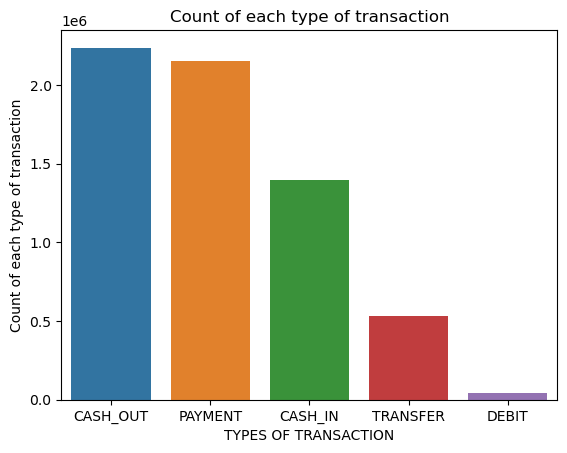

In [11]:
#1) Count of each type of transaction
sns.countplot(x=df['type'],order=df['type'].value_counts().index)
plt.xlabel("TYPES OF TRANSACTION")
plt.ylabel("Count of each type of transaction")
plt.title("Count of each type of transaction")
plt.show()

In [12]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

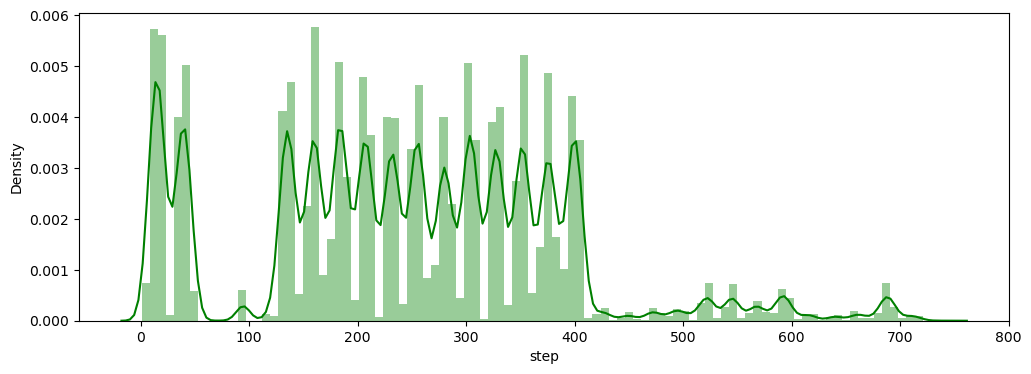

In [13]:
# distplot of step to check its frequency distribution 
plt.figure(figsize=(12, 4))
sns.distplot(df['step'], bins=100,hist=True,color='green')
plt.show()

In [14]:
print("min amount transacted: ",df["amount"].min())
print("max amount transacted: ",df["amount"].max())
min_amt=df["amount"].min()
max_amt=df["amount"].max()
# binning of amount into buckets of range 50000
df['Amount_bins']  = pd.cut(df['amount'],bins=list(range(0,92645517,100000)))
df['Amount_bins'].value_counts()


min amount transacted:  0.0
max amount transacted:  92445516.64


(0, 100000]             3525282
(100000, 200000]        1163752
(200000, 300000]         747313
(300000, 400000]         396862
(400000, 500000]         189111
                         ...   
(61200000, 61300000]          0
(61100000, 61200000]          0
(61000000, 61100000]          0
(60800000, 60900000]          0
(92500000, 92600000]          0
Name: Amount_bins, Length: 926, dtype: int64

In [15]:
# pivot table after binning
pt = pd.pivot_table(data=df,columns=['isFraud'],index=['Amount_bins'],values=['amount'])
pt  # default agg used is mean


amount               
isFraud                          0              1
Amount_bins                                      
(0, 100000]           2.708592e+04   43181.580183
(100000, 200000]      1.473696e+05  144785.296222
(200000, 300000]      2.453055e+05  247441.402229
(300000, 400000]      3.441483e+05  347531.149341
(400000, 500000]      4.437669e+05  448498.769340
...                            ...            ...
(69300000, 69400000]  6.933732e+07            NaN
(69800000, 69900000]  6.988673e+07            NaN
(71100000, 71200000]  7.117248e+07            NaN
(73800000, 73900000]  7.382349e+07            NaN
(92400000, 92500000]  9.244552e+07            NaN

[479 rows x 2 columns]

In [16]:
df['nameOrig'].nunique()

6353307

In [17]:
df['nameDest'].nunique()

2722362

In [18]:
# plt.scatter(df['nameOrig'],df['nameDest'],cmap='coolwarm')
# plt.xlabel('nameOrig')
# plt.ylabel('nameDest')
# plt.show()

In [19]:
pt.columns

MultiIndex([('amount', 0),
            ('amount', 1)],
           names=[None, 'isFraud'])

In [20]:
#ENCODING "TYPE" COLUMN
from sklearn.preprocessing import LabelEncoder

In [21]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [22]:
lb = LabelEncoder()
df['type'] = lb.fit_transform(df['type'])
df['type'].value_counts()
# It follows alphabetical order (asc)

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

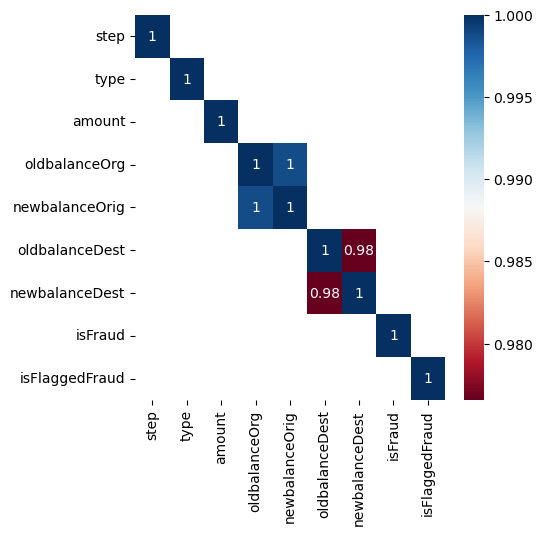

In [23]:
#correlation check
corr = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='RdBu')
plt.show()

## CLASSIFICATION MODEL 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
x = df.drop(['isFraud', 'nameOrig', 'nameDest','Amount_bins'],axis=1)
y = df['isFraud']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(6362620, 8)
(6362620,)


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4771965, 8)
(1590655, 8)
(4771965,)
(1590655,)


In [34]:
x_train.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64

#### As the train data is highly imbalanced towards 0, the test results will be biased towards 0 too.

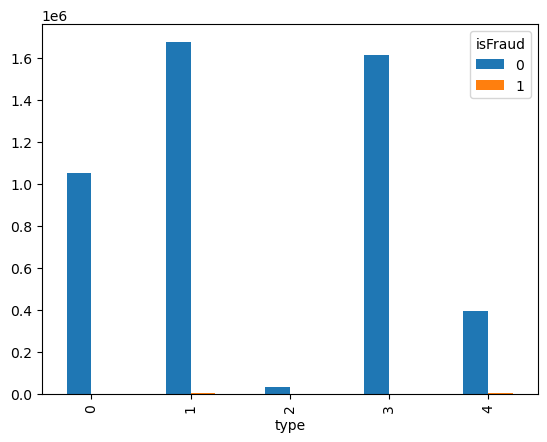

In [47]:
#fraudulent transaction in each type
pd.crosstab(x_train['type'],y_train).plot(kind="bar",stacked=False)
plt.show()

##### applying SMOTE for balancing train data in order to get unbiased test results 

In [29]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [37]:
from collections import Counter
c = Counter(y_sm)
print(c)

Counter({0: 4765797, 1: 4765797})


In [38]:
print(x_sm.shape)
print(x_test.shape)
print(y_sm.shape)
print(y_test.shape)

(9531594, 8)
(1590655, 8)
(9531594,)
(1590655,)


In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    print('Predictions\n',y_pred)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

In [ ]:
#LOGISTIC REGRESSION

In [42]:
lr_smote = LogisticRegression(max_iter=1000)
gen_metrics(lr_smote,x_sm,x_test,y_sm,y_test)

Predictions
 [0 1 0 ... 0 0 0]
Training score 0.9209461712280234
Testing score 0.9318287120714422
Accuracy_Score 0.9318287120714422
Confusion Matrix
 [[1480399  108211]
 [    226    1819]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.93      0.96   1588610
           1       0.02      0.89      0.03      2045

    accuracy                           0.93   1590655
   macro avg       0.51      0.91      0.50   1590655
weighted avg       1.00      0.93      0.96   1590655



In [48]:
# XG BOOST CLASSIFIER
import xgboost as xgb

In [49]:
XG_model = xgb.XGBClassifier()
XG_model.fit(x_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred = XG_model.predict(x_sm)

In [51]:
gen_metrics(XG_model,x_sm,x_test,y_sm,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training score 0.9987752310893645
Testing score 0.9978191373993732
Accuracy_Score 0.9978191373993732
Confusion Matrix
 [[1585158    3452]
 [     17    2028]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.37      0.99      0.54      2045

    accuracy                           1.00   1590655
   macro avg       0.69      0.99      0.77   1590655
weighted avg       1.00      1.00      1.00   1590655



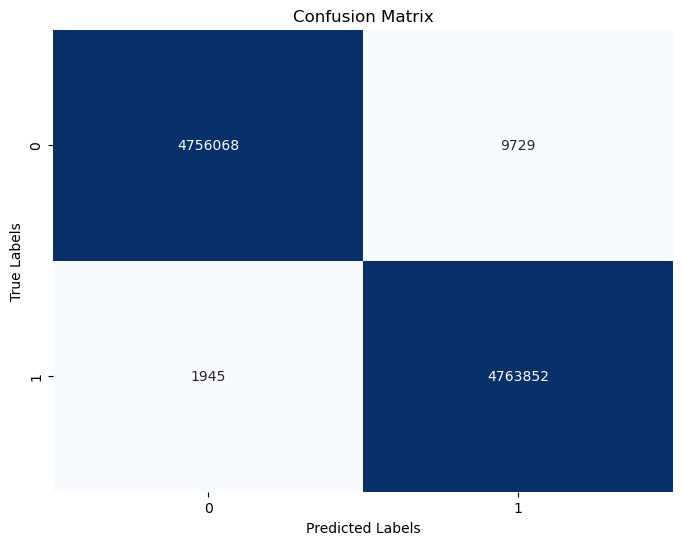

In [52]:
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TRUE NEGATIVES = 4756068
FALSE POSITIVES = 9729
FALSE NEGATIVES = 1945
TRUE POSITIVES =  4763852

In [62]:
ypred_prob = XG_model.predict_proba(x_test)
ypred_prob[:7]

array([[1.00000000e+00, 9.52113943e-09],
       [9.99992251e-01, 7.74231103e-06],
       [9.99999881e-01, 1.02280296e-07],
       [1.00000000e+00, 1.02634168e-08],
       [9.99999642e-01, 3.75997843e-07],
       [9.99899387e-01, 1.00606885e-04],
       [9.99982119e-01, 1.78760365e-05]], dtype=float32)

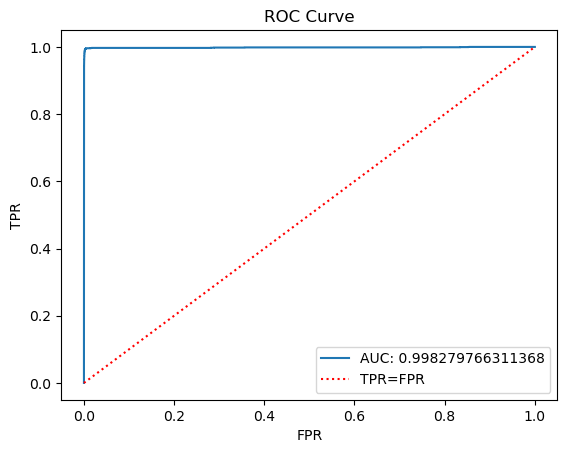

In [63]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr,tpr,thresh = roc_curve(y_test,ypred_prob[:,1])   # ROC curve
auc_score = roc_auc_score(y_test,ypred_prob[:,1])    # AUC_score
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='red',linestyle='dotted',label='TPR=FPR')
plt.title('ROC Curve')
plt.xlabel('FPR')  # FP/(TN+FP)
plt.ylabel('TPR')  # TP/(TP+FN)
plt.legend()
plt.show()